# Who To Recruit For A NCAA Men's Basketball Championship
###                   Keith Ross             
###                 Jordan Whitney
###                  Brian Ross
# Core Message
## Can it be determined if the ranking of high school players and how a team is made up of those players can determine a teams Final Four/National Championship success. We will analyze the past 19 years of Final Four teams to answer these questions.

# Research Questions
### - Should teams target specific rankings? IE: Do teams with more top 100 players do better than teams with less top 100 players
### - Do teams consisting of upperclassmen/experienced players perform better and advance to the final four?
### - When recruiting at the high school level, can conclusions be drawn about the location in which the student-athlete grew up?

# Data Sets
### - Rosters from https://www.sports-reference.com/cbb/
### - Recruiting rankings from https://sites.google.com/site/rscihoops/home

# Data Cleanup & Exploration
### - Website extraction and consistant formatting
### - Current years had more data 




In [3]:
#notebook to be used for cleaning and organizing data
%matplotlib inline 
#can use inline if we prefer

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import numpy as np
from config import api_key
import scipy.stats as stats

#pull and read rankings
rankings_excel = 'HighSchool_100_Rankings.xlsx'
rankings = pd.read_excel(rankings_excel)
#rankings.head() - test worked

#pull and read team data
team_excel = 'Team_Data.xlsx'
team = pd.read_excel(team_excel)
del team['Hometown']
#team.head() - test worked

In [5]:
#split hometown into two columns, rename and add back into rankings
hometown_split = rankings['Hometown'].str.split(', ',expand=True)
rankings['City'] = hometown_split[0]
rankings['State'] = hometown_split[1]
del rankings['Hometown']
rankings.head()

,Year,RSCI,Player Name,Position,College,City,State
0,2018,1,R.J. Barrett,SF,Duke,Montverde,FL
1,2018,2,Cameron Reddish,SG,Duke,Norristown,PA
2,2018,3,Nassir Little,SF,North Carolina,Orlando,FL
3,2018,4,Zion Williamson,PF,Duke,Spartanburg,SC
4,2018,5,Romeo Langford,SG,Indiana,New Albany,IN


In [6]:
#team data, reprinting for ease
team.head()

,Player,Team,Year,Class,Pos,RSCI Top 100,Pts.,Winner
0,Jay Williams,Duke,2001,SO,G,3.0,21.6,Yes
1,Shane Battier,Duke,2001,SR,F,NaN,19.9,Yes
2,Mike Dunleavy,Duke,2001,SO,F,26.0,12.6,Yes
3,Nate James,Duke,2001,SR,F,NaN,12.3,Yes
4,Carlos Boozer,Duke,2001,SO,C,8.0,13.3,Yes


In [7]:
#state count
state_df = pd.DataFrame(rankings.groupby('State').count())
state_df = state_df.reset_index()
state_df.head()

,State,Year,RSCI,Player Name,Position,College,City
0,AL,23,23,23,23,23,23
1,AN,1,1,1,1,1,1
2,AR,9,9,9,9,9,9
3,AUS,1,1,1,1,1,1
4,AZ,6,6,6,6,6,6


In [8]:
#Team Data/Class makeup by year
year_team_grade = team.groupby(['Year','Team'])['Class'].value_counts()
year_team_grade.head()

Year  Team     Class
2001  Arizona  SO       3
               SR       3
               JR       2
      Duke     SO       4
               SR       2
Name: Class, dtype: int64

In [9]:
#total grades in tournament
grade = team.groupby('Class').count()
grade

#team upperclassmen count by year
#team ranking in top 100 total

,Player,Team,Year,Pos,RSCI Top 100,Pts.,Winner
Class,,,,,,,
FR,119,119,119,119,84,119,119
JR,182,182,182,182,107,182,182
SO,151,151,151,151,101,151,151
SR,157,157,157,157,62,157,157


In [10]:
#count of grade/class in each year
grade_year_df = pd.DataFrame(team.groupby('Year')['Class'].value_counts())

grade_year_df = grade_year_df.rename(columns = {'Class' : 'Total Player per Class'})
grade_year_df = grade_year_df.reset_index()
grade_year_df.head()


,Year,Class,Total Player per Class
0,2001,SO,11
1,2001,SR,11
2,2001,JR,7
3,2001,FR,3
4,2002,JR,13


In [11]:
gradeaverage_final_four = team.groupby('Class').count()/19
gradeaverage_final_four = gradeaverage_final_four.reset_index()
gradeaverage_final_four = round(gradeaverage_final_four,2)
gradeaverage_final_four_df = gradeaverage_final_four.rename(columns = {'Player':'Average Overall'})
gradeaverage_final_four_df = gradeaverage_final_four_df.drop(gradeaverage_final_four_df.columns[[2,3,4,5,6,7,]], axis=1)

gradeaverage_final_four_df

,Class,Average Overall
0,FR,6.26
1,JR,9.58
2,SO,7.95
3,SR,8.26


In [12]:
gradeaverage_winner_df = team.loc[team["Winner"] == "Yes", :]
gradeaverage_winner_df = gradeaverage_winner_df.groupby('Class').count()/19
gradeaverage_winner_df = gradeaverage_winner_df.reset_index()
gradeaverage_winner_df = round(gradeaverage_winner_df,2)
gradeaverage_winner_df = gradeaverage_winner_df.rename(columns = {'Player':'Average Overall'})
gradeaverage_winner_df = gradeaverage_winner_df.drop(gradeaverage_winner_df.columns[[2,3,4,5,6,7,]], axis=1)
gradeaverage_winner_df

,Class,Average Overall
0,FR,1.79
1,JR,2.42
2,SO,1.89
3,SR,1.89


In [13]:
winner_grade_year_df = team.loc[team["Winner"] == "Yes", :]
winner_grade_year_df = pd.DataFrame(winner_grade_year_df.groupby('Year')['Class'].value_counts())
winner_grade_year_df = winner_grade_year_df.rename(columns = {'Class' : 'Total Player per Class'})
winner_grade_year_df = winner_grade_year_df.reset_index()
winner_grade_year_df.head()

,Year,Class,Total Player per Class
0,2001,SO,4
1,2001,SR,2
2,2001,FR,1
3,2001,JR,1
4,2002,JR,3


In [14]:
#team occurrences final four
team_finalfour = team.groupby('Team').count()/8
team_finalfour.head()

,Player,Year,Class,Pos,RSCI Top 100,Pts.,Winner
Team,,,,,,,
Arizona,1.0,1.0,1.0,1.0,0.625,1.0,1.0
Auburn,1.0,1.0,1.0,1.0,0.375,1.0,1.0
Butler,2.0,2.0,2.0,2.0,0.000,2.0,2.0
Duke,4.0,4.0,4.0,4.0,3.375,4.0,4.0
Florida,3.0,3.0,3.0,3.0,1.750,3.0,3.0


In [15]:
year_final_four_top100_df = team.groupby(['Year'])[['RSCI Top 100']].count()
year_final_four_top100_df.reset_index()
year_final_four_top100_df = year_final_four_top100_df.reset_index()
year_final_four_top100_df.head()

,Year,RSCI Top 100
0,2001,17
1,2002,16
2,2003,19
3,2004,20
4,2005,25


In [16]:
year_winner_top100_count = team.loc[team["Winner"] == "Yes", :]
year_winner_top100_df = year_winner_top100_count.groupby(['Year'])[['RSCI Top 100']].count()
year_winner_top100_df.reset_index()
year_winner_top100_df = year_winner_top100_df.reset_index()

year_winner_top100_df.head()

,Year,RSCI Top 100
0,2001,5
1,2002,4
2,2003,5
3,2004,7
4,2005,7


In [17]:
merged_top100_df = pd.merge(year_final_four_top100_df, year_winner_top100_df , on='Year')
merged_top100_df = merged_top100_df.rename(columns = {'RSCI Top 100_x' : 'Final Four Top 100','RSCI Top 100_y': 'Winner Top 100'})
merged_top100_df.head()

,Year,Final Four Top 100,Winner Top 100
0,2001,17,5
1,2002,16,4
2,2003,19,5
3,2004,20,7
4,2005,25,7


In [18]:
merged_top100_df['Winners % of Top 100 Final Four'] = merged_top100_df['Winner Top 100']/merged_top100_df['Final Four Top 100']
merged_top100_df['Result']= merged_top100_df['Winners % of Top 100 Final Four']*100
merged_top100_df = round(merged_top100_df,2)
percentage_of_top100_in_final_four = merged_top100_df.rename(columns = {'Result':'Winners % of Top 100 in Final Four','Winners % of Top 100 Final Four':'Result'})
percentage_of_top100_in_final_four.head()

#percentage_of_top100_in_final_four = percentage_of_top100_in_final_four['Winners % of Top 100 Final Four']*100
#percentage_of_top100_in_final_four = round(percentage_of_top100_in_final_four,2)



#percentage_of_top100_in_final_four.head()
#percentage_of_top100_in_final_four = percentage_of_top100_in_final_four.reset_index()


,Year,Final Four Top 100,Winner Top 100,Result,Winners % of Top 100 in Final Four
0,2001,17,5,0.29,29.41
1,2002,16,4,0.25,25.00
2,2003,19,5,0.26,26.32
3,2004,20,7,0.35,35.00
4,2005,25,7,0.28,28.00


In [19]:
#top 100 players recruited by all teams over the years of our data
team_ranking_count_total = team.groupby('Team')['RSCI Top 100'].count()
team_ranking_count_total.sort_values(ascending=False).head()

Team
North Carolina    38
Michigan State    34
Kansas            31
Kentucky          31
Duke              27
Name: RSCI Top 100, dtype: int64

In [20]:
#top 100 players (their rankings) on teams in a given year
year_team_ranking_list = team.groupby(['Year','Team'])['RSCI Top 100'].count()
year_team_ranking_list.head()

Year  Team          
2001  Arizona           5
      Duke              5
      Maryland          3
      Michigan State    4
2002  Indiana           4
Name: RSCI Top 100, dtype: int64

In [21]:
###### Bins are 0, 59, 69, 79, 89, 100.   
bins = [0, 19, 39, 59, 79, 100]

# Create the names for the four bins
group_names = ["Top 20", "21-40", "41-60", "61-80","81-100"]

team["Binned 100"] = pd.cut(team["RSCI Top 100"], bins, labels=group_names)
team["Binned 100"]
team.head()

,Player,Team,Year,Class,Pos,RSCI Top 100,Pts.,Winner,Binned 100
0,Jay Williams,Duke,2001,SO,G,3.0,21.6,Yes,Top 20
1,Shane Battier,Duke,2001,SR,F,NaN,19.9,Yes,NaN
2,Mike Dunleavy,Duke,2001,SO,F,26.0,12.6,Yes,21-40
3,Nate James,Duke,2001,SR,F,NaN,12.3,Yes,NaN
4,Carlos Boozer,Duke,2001,SO,C,8.0,13.3,Yes,Top 20


In [22]:
team_binned_df = team.loc[team["Winner"] == "Yes", :]
team_binned_df  = pd.DataFrame(team_binned_df .groupby('Year')['Binned 100'].value_counts())
team_binned_df  = team_binned_df.rename(columns = {'Binned 100' : 'Total Players'})
#team_binned_df  = winner_grade_year_df.reset_index()
team_binned_df.head()

Total Players
Year Binned 100               
2001 Top 20                  4
     21-40                   1
2002 21-40                   1
     41-60                   1
     61-80                   1

In [23]:
final_four_binned_df = pd.DataFrame(team.groupby('Year')['Binned 100'].value_counts())

final_four_binned_df = final_four_binned_df.rename(columns = {'Binned 100' : 'Total Player'})
#final_four_binned_df = final_four_binned_df.reset_index()
final_four_binned_df.head()

Total Player
Year Binned 100              
2001 Top 20                 8
     21-40                  4
     61-80                  2
     81-100                 2
     41-60                  1

In [24]:
winner_binned_class_df = team.loc[team["Winner"] == "Yes", :]
winner_binned_class_df = pd.DataFrame(winner_binned_class_df.groupby('Class')['Binned 100'].value_counts())
winner_binned_class_df = winner_binned_class_df.rename(columns = {'Binned 100' : 'Total Players'})
winner_binned_class_df = winner_binned_class_df.reset_index()
winner_binned_class_df.head()

,Class,Binned 100,Total Players
0,FR,Top 20,16
1,FR,21-40,5
2,FR,61-80,4
3,FR,81-100,3
4,JR,Top 20,13


In [25]:
winner_binned_class1_df = winner_binned_class_df.groupby(['Binned 100'])[['Total Players']].sum()
winner_binned_class1_df = winner_binned_class1_df.sort_values('Total Players', ascending=False)
winner_binned_class1_df

,Total Players
Binned 100,
Top 20,41
21-40,32
61-80,17
41-60,14
81-100,13


In [26]:
final_four_binned_class_df = pd.DataFrame(team.groupby('Class')['Binned 100'].value_counts())
final_four_binned_class_df= final_four_binned_class_df.rename(columns = {'Binned 100' : 'Total Players'})
final_four_binned_class_df = final_four_binned_class_df.reset_index()
final_four_binned_class_df = final_four_binned_class_df.groupby(['Binned 100'])[['Total Players']].sum()
final_four_binned_class_df = final_four_binned_class_df.sort_values('Total Players', ascending=False)
final_four_binned_class_df

,Total Players
Binned 100,
Top 20,104
21-40,100
41-60,58
61-80,49
81-100,43


# Data Analysis

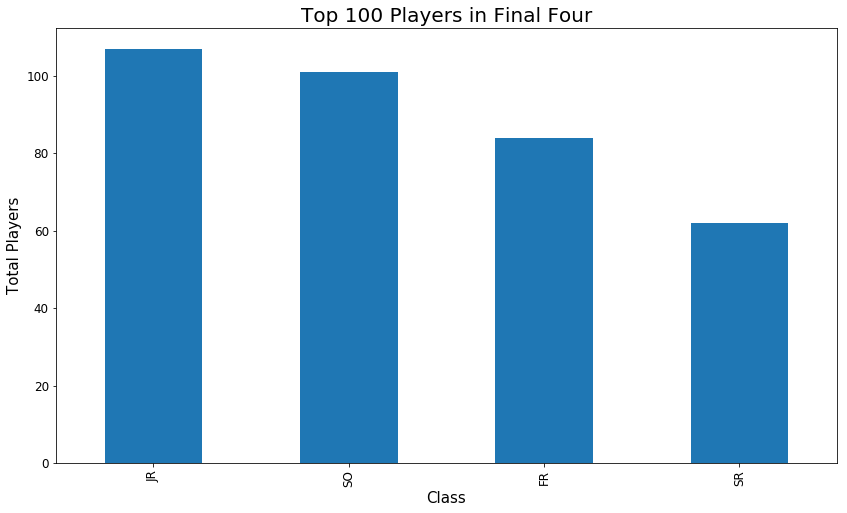

In [27]:
grade_df = team.groupby('Class').count()
grade_df = grade_df.sort_values('RSCI Top 100', ascending=False)
ax = grade_df[['RSCI Top 100']].plot(kind='bar', title ="Top 100 Players in Final Four", figsize=(14, 8), legend=False, fontsize=12)
ax.set_xlabel("Class", fontsize=15)
ax.set_ylabel("Total Players", fontsize=15)
plt.title('Top 100 Players in Final Four', fontsize = 20)
plt.xticks(fontsize=12)
plt.show() 

# Top 100 Players in Final Four
### - Juniors and Sophomores tend to make up more of the top 100 Players in the Final Four than Freshman and Seniors
### - Seniors total could be explained by Juniors turning pro before Senior season

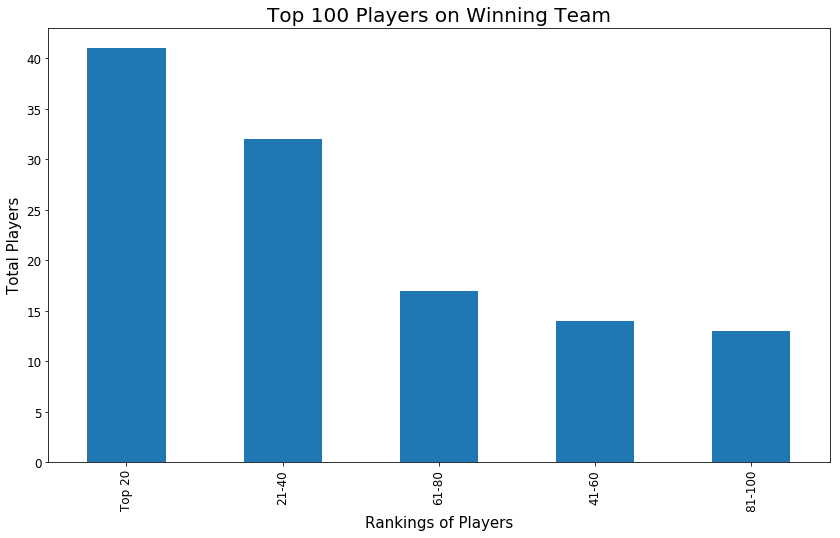

In [28]:
ax1 = winner_binned_class1_df[['Total Players']].plot(kind='bar', title ="Top 100 Players on Winning Team", figsize=(14, 8), legend=False, fontsize=12)
ax1.set_xlabel("Rankings of Players", fontsize=15)
ax1.set_ylabel("Total Players", fontsize=15)
plt.title('Top 100 Players on Winning Team', fontsize = 20)
plt.xticks(fontsize=12)
plt.show() 

# Top 100 Players on Winning Team
### - The top players appear to have more of an impact and win more national titles
### - Additional analysis could be done on these bins

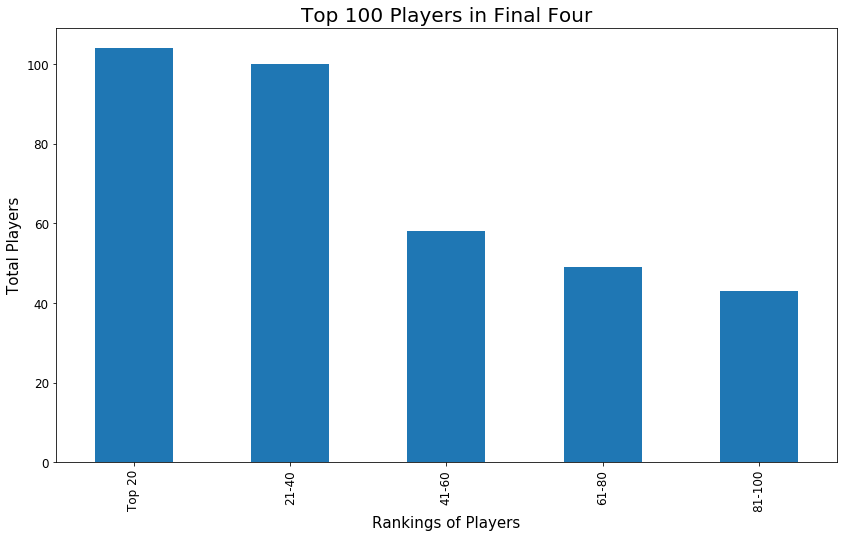

In [29]:

ax = final_four_binned_class_df[['Total Players']].plot(kind='bar', title ="Top 100 Players In Final Four", figsize=(14, 8), legend=False, fontsize=12)
ax.set_xlabel("Rankings of Players", fontsize=15)
ax.set_ylabel("Total Players", fontsize=15)
plt.title('Top 100 Players in Final Four', fontsize = 20)
plt.xticks(fontsize=12)
plt.show() 


# Top 100 Players in Final Four
### - The top players appear to have more of an impact and appear in more Final Fours
### - Additional analysis could be done on these bins

[]

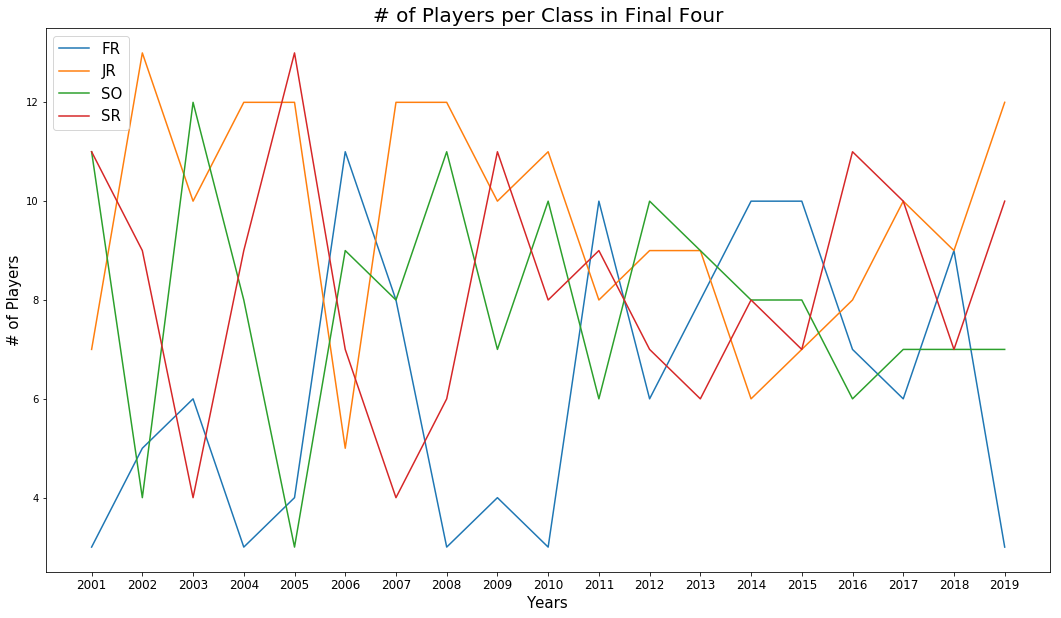

In [30]:
fig, ax = plt.subplots(figsize=(18,10))
grade_year_df.groupby(['Year','Class']).sum()['Total Player per Class'].unstack().plot(ax=ax)
plt.legend(fontsize = 15)
plt.xticks(np.arange(2001, 2020, step=1))
ax.set_xlabel("Years", fontsize=15)
ax.set_ylabel("# of Players", fontsize=15)
plt.title('# of Players per Class in Final Four', fontsize = 20)
plt.xticks(fontsize=12)
plt.plot()

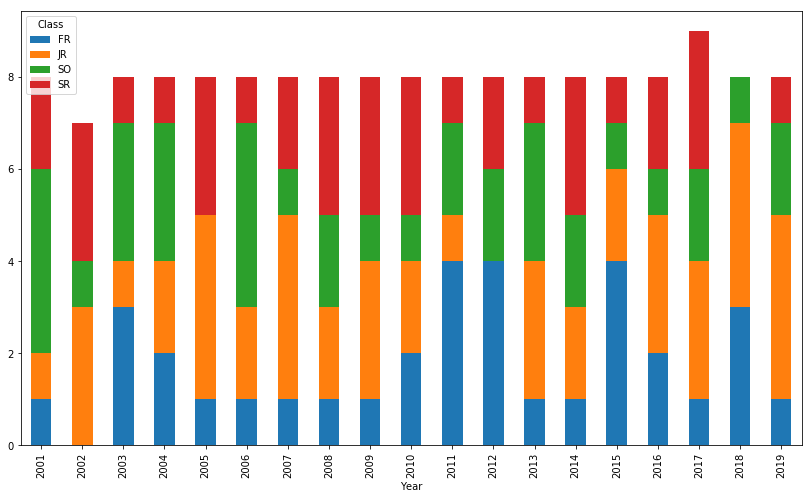

In [31]:
pivot = pd.pivot_table(winner_grade_year_df, index='Year',columns="Class", values='Total Player per Class')
pivot.plot(kind='bar',stacked=True,figsize=(14, 8))

# Winning Team class makeup
### - This graph does not help in any determination.

Text(0.5, 1.0, 'Average of Class in Final Four')

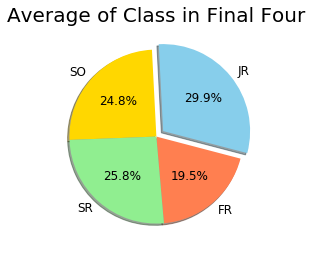

In [32]:
# Build Pie Chart
labels = gradeaverage_final_four_df["Class"]

sizes = gradeaverage_final_four_df['Average Overall']

colors = ["coral", "skyblue", "gold","lightgreen"]


explode = (0,.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,textprops={'fontsize': 12},
        autopct="%1.1f%%", shadow=True, startangle=275)
plt.title("Average of Class in Final Four", fontsize=20)

# Final Four class makeup
### - Juniors vs Freshman

Text(0.5, 1.0, 'Average of Class of Winner')

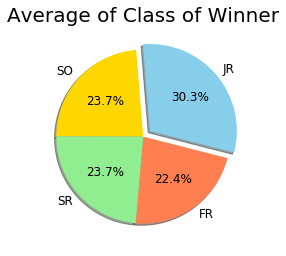

In [33]:
# Build Pie Chart
labels = gradeaverage_winner_df["Class"]

sizes = gradeaverage_winner_df['Average Overall']

colors = ["coral", "skyblue", "gold","lightgreen"]

explode = (0,.1,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, textprops={'fontsize': 12},
        autopct="%1.1f%%", shadow=True, startangle=265)

plt.title("Average of Class of Winner", fontsize=20)


# National Champion class makeup
### - Juniors vs the rest
### - Chi square value did not exceed the critical value so these results are not statistically significant.

In [34]:
#Chi Square Test
observed = pd.Series([30.3,22.4,23.7,23.7], index = ['Junior','Freshman','Sophomore','Senior'])
df = pd.DataFrame([observed]).T
df[1] = 25
df.columns =['observed','expected']
df

,observed,expected
Junior,30.3,25
Freshman,22.4,25
Sophomore,23.7,25
Senior,23.7,25


In [35]:
#Critical Value
critical_value= stats.chi2.ppf(q=.80,df=3)
critical_value

4.64162767608745

In [36]:
stats.chisquare(df['observed'],df['expected'])

Power_divergenceResult(statistic=1.5292000000000008, pvalue=0.6755475679020975)

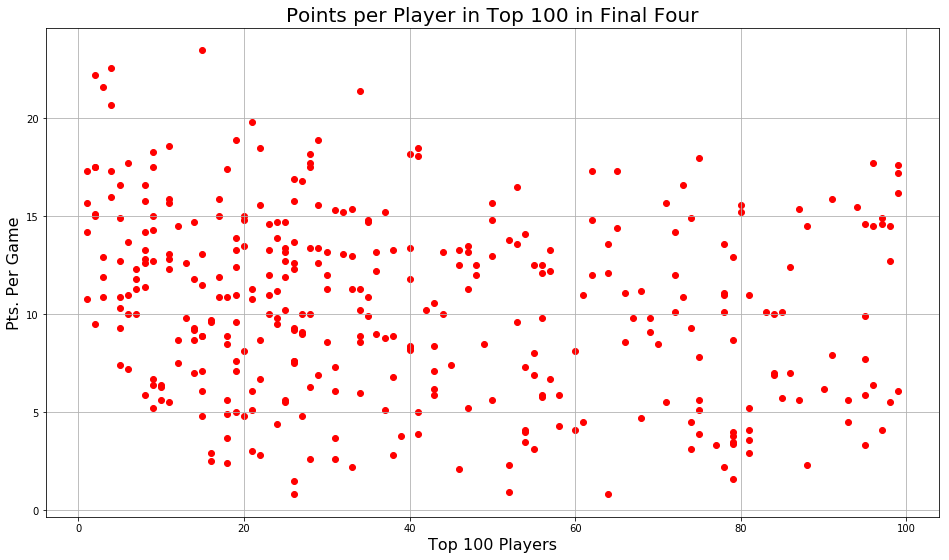

In [43]:
plt.scatter(team['RSCI Top 100'], team['Pts.'],color='red')
plt.title('Points per Player in Top 100 in Final Four', fontsize=20)
plt.xlabel('Top 100 Players', fontsize=16)
plt.ylabel('Pts. Per Game', fontsize=16)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

# Points per game for top 100 players in Final Four
### - Appears that more top 40 players make Final Four
### - Points per game fairly consistent amount these players

In [38]:
data = [dict(type='choropleth', autocolorscale=False, locations = state_df['State'], z= state_df['Year'], locationmode='USA-states', colorscale= 'Reds', colorbar= dict(title='Top 100 per State'))]
layout = dict(title='Top 100 Players per State', geo = dict(scope='usa', projection=dict(type='albers usa'), showlakes= True, lakecolor='rgb(66,165,245)',),)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Top100')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~KeithRoss/0 or inside your plot.ly account where it is named 'Top100'


C:\Users\rossk\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Top 100 High School players per state
### - California and Texas produce the two highest amounts of top 100 high school players.  California and Texas college teams have only 3 final four appearances and no national titles in last 19 years.
### - In general this would appear to be a U.S. Population heat map.  Virginia, North Carolina, and Georgia appear to stand out.
### - Univ of Virginia, Duke (NC), and Univ of North Carolina were 3 of the 4 #1 seeds in this years tournament.
### - With additional time it would be interesting to run additional analysis in seeing what percentage of CA and TX high school players stayed in state vs other states with more basketball rich traditions

[]

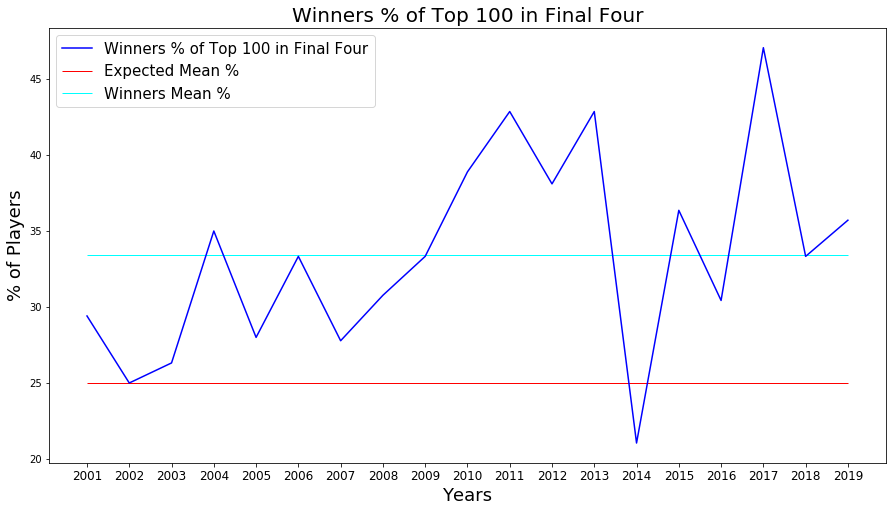

In [39]:
percentage_of_top100_in_final_four.plot(x='Year', y='Winners % of Top 100 in Final Four', color='blue', figsize=(15,8))
plt.hlines(y=25, xmin=2001, xmax=2019, linewidth=1, color='r', label='Expected Mean %')
plt.hlines(y=percentage_of_top100_in_final_four['Winners % of Top 100 in Final Four'].mean(),xmin=2001,xmax=2019, linewidth=1, label='Winners Mean %', color='cyan')
plt.legend(fontsize = 15)
plt.xticks(np.arange(2001, 2020, step=1))
plt.xlabel("Years", fontsize=18)
plt.ylabel("% of Players", fontsize=18)
plt.title('Winners % of Top 100 in Final Four', fontsize = 20)
plt.xticks(fontsize=12)
plt.plot()


# National Champion % of Top 100 in Final Four
### - With four teams the expected value is 25% per team.  Winner only had less than 25% 1 time.
### - Chi square value of 81.2 did exceed the critical value of 34.8 so these results are statistically significant.  Used .01 p-value.

In [40]:
#Chi Square Test
observed1 = pd.Series([29.41,25,26.32,35,28,33.33,27.78,30.77,33.33,38.89,42.86,38.1,42.86,21.05,26.36,30.43,47.06,33.33,35.71], index = ['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
df1 = pd.DataFrame([observed1]).T
df1[1] = 25
df1.columns =['observed','expected']
df1.head()

,observed,expected
2001,29.41,25
2002,25.00,25
2003,26.32,25
2004,35.00,25
2005,28.00,25


In [41]:
#Critical Value
critical_value1= stats.chi2.ppf(q=.99,df=18)
critical_value1

34.805305734705065

In [42]:
stats.chisquare(df1['observed'],df1['expected'])

Power_divergenceResult(statistic=81.20658, pvalue=5.26560843263818e-10)